In [4]:
import os
from dotenv import load_dotenv
import requests
import json

load_dotenv()
# Register from footbal-data.org and get personal API key
api_key = os.getenv("api_key")
headers = {"X-Auth-Token": api_key}

url = "https://api.football-data.org/v4/competitions/PL/standings"

# Call API request with GET method
response = requests.get(url, headers=headers)

try:
    # Get the response in JSON format
    data = response.json()
    
    # Save the content in JSON file to recall the data without reaching free token tier
    with open("premier_league_standings.json", "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)
    
    print("✅ Data saved to premier_league_standings.json")
except:
    print("❌ Error:", response.status_code, response.text)


✅ Data saved to premier_league_standings.json


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON data
with open("premier_league_standings.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# data is a dict → point to "standings"
# "standings" is a list → use index 0 to access the first dictionary
# that dictionary has a key "table" → which is a list of teams (dicts)
# each element in "table" is a dict → representing one team
table = data["standings"][0]["table"]

# Convert to DataFrame
df = pd.DataFrame(table)
df["team_name"] = df["team"].apply(lambda x: x["name"])  # team là dict => lấy "name"

# The first 5 records
print(df.head())


   position                                               team  playedGames  \
0         1  {'id': 64, 'name': 'Liverpool FC', 'shortName'...            4   
1         2  {'id': 57, 'name': 'Arsenal FC', 'shortName': ...            4   
2         3  {'id': 73, 'name': 'Tottenham Hotspur FC', 'sh...            4   
3         4  {'id': 1044, 'name': 'AFC Bournemouth', 'short...            4   
4         5  {'id': 61, 'name': 'Chelsea FC', 'shortName': ...            4   

   form  won  draw  lost  points  goalsFor  goalsAgainst  goalDifference  \
0  None    4     0     0      12         9             4               5   
1  None    3     0     1       9         9             1               8   
2  None    3     0     1       9         8             1               7   
3  None    3     0     1       9         6             5               1   
4  None    2     2     0       8         9             3               6   

              team_name  
0          Liverpool FC  
1            Ars

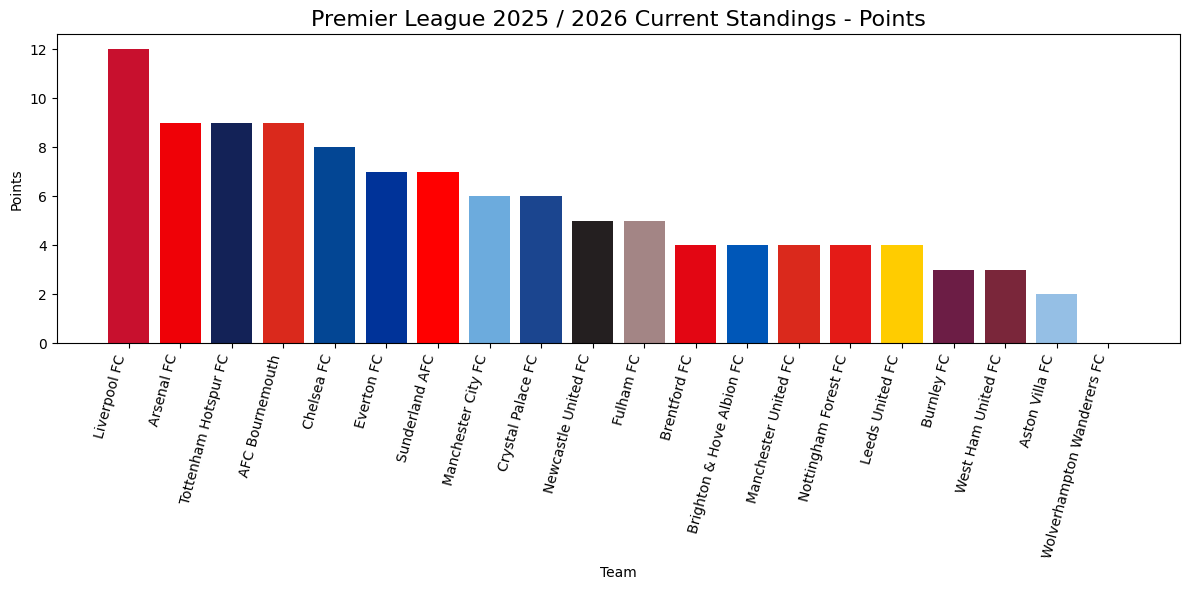

In [3]:
# Sort by ranking (position)
df_sorted = df.sort_values("position")

# Optional: A dictionary to store colors associate with each team
team_colors = {
    "Liverpool FC": "#C8102E",
    "Arsenal FC": "#EF0107",
    "Tottenham Hotspur FC": "#132257",
    "AFC Bournemouth": "#DA291C",
    "Chelsea FC": "#034694",
    "Everton FC": "#003399",
    "Sunderland AFC": "#FF0000",
    "Manchester City FC": "#6CABDD",
    "Crystal Palace FC": "#1B458F",
    "Newcastle United FC": "#241F20",
    "Fulham FC": "#A38585",
    "Brentford FC": "#E30613",
    "Brighton & Hove Albion FC": "#0057B8",
    "Manchester United FC": "#DA291C",
    "Nottingham Forest FC": "#E41B17",
    "Leeds United FC": "#FFCC00",
    "Burnley FC": "#6C1D45",
    "West Ham United FC": "#7A263A",
    "Aston Villa FC": "#95BFE5",
    "Wolverhampton Wanderers FC": "#FDB913"
}


colors = [team_colors[team] for team in df_sorted["team_name"]]


# Plot

# Create a figure size 12 x 6 inch
plt.figure(figsize=(12,6))

# Define the bar: Represents the point of each team_name in sorted order earlier 
plt.bar(df_sorted["team_name"], df_sorted["points"], color=colors)

# Title of the figure
plt.title("Premier League 2025 / 2026 Current Standings - Points", fontsize=16)

# Label for x & y axis
plt.xlabel("Team")
plt.ylabel("Points")

# Direction to display team's name
plt.xticks(rotation=75, ha="right")

# Auto rearrange the content avoid exceed screen limit
plt.tight_layout()
plt.show()
